#### For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

`pip install vega_datasets`


You can use this library like so:

`from vega_datasets import data
data.sf_temps()`

Use the above dataset for the exercises below:

In [1]:
import pandas as pd
import numpy as np
import datetime

from vega_datasets import data

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
tempsdf = data.sf_temps()
tempsdf.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


In [3]:
tempsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
# check for nulls
tempsdf.isnull().sum()

temp    0
date    0
dtype: int64

In [5]:
#set datetime col as index and sort
tempsdf = tempsdf.set_index('date').sort_index()
tempsdf.head(3)

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90


### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [6]:
#resampling by day and take average
tempsdf.resample('D').mean()

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49
...,...
2010-12-27,48.99
2010-12-28,49.00
2010-12-29,49.01


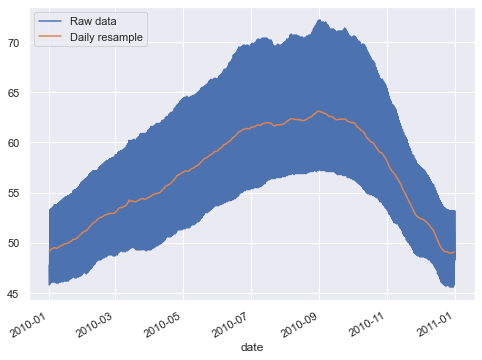

In [7]:
#visualize average temperature over time w/ daily resampled data

tempsdf.temp.plot(label = 'Raw data')
tempsdf.resample('D').mean().temp.plot(label = 'Daily resample')
plt.legend();

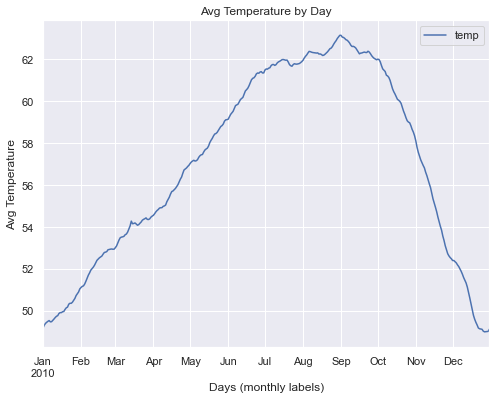

In [8]:
#visualize w/out raw data
tempsdf.resample('D').mean().plot()

plt.title('Avg Temperature by Day')
plt.ylabel('Avg Temperature')
plt.xlabel('Days (monthly labels)')
plt.show()

### 2. Write the code necessary to visualize the minimum temperature over time.

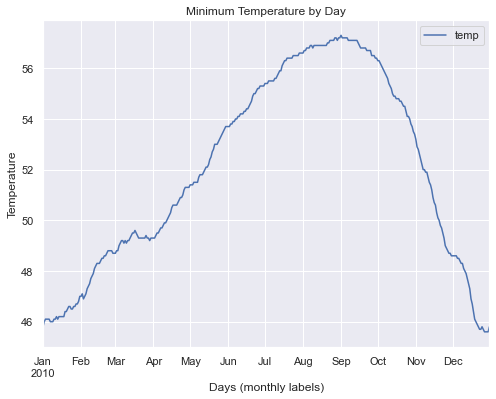

In [9]:
tempsdf.resample('D').min().plot()
plt.title('Minimum Temperature by Day')
plt.ylabel('Temperature')
plt.xlabel('Days (monthly labels)')
plt.show()

### 3. Write the code necessary to visualize the maximum temperature over time.

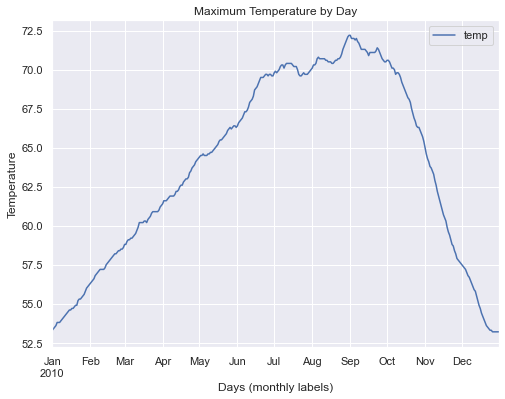

In [10]:
tempsdf.resample('D').max().plot()
plt.title('Maximum Temperature by Day')
plt.ylabel('Temperature')
plt.xlabel('Days (monthly labels)')
plt.show()

### 4. Which month is the coldest, on average?
- January

In [11]:
tempsdf.resample('M').mean()

,temp
date,
2010-01-31,49.98
2010-02-28,52.24
2010-03-31,53.96
2010-04-30,55.63
2010-05-31,57.97
2010-06-30,60.44
2010-07-31,61.77
2010-08-31,62.41
2010-09-30,62.49


In [12]:
tempsdf.resample('M').mean().idxmin()

temp   2010-01-31
dtype: datetime64[ns]

In [13]:
avg_coldest_month = tempsdf.resample('M').mean().head(1)
avg_coldest_month

,temp
date,
2010-01-31,49.98


In [14]:
#alternate:
tempsdf.temp.resample('M').mean().sort_values().head(1)

date
2010-01-31   49.98
Name: temp, dtype: float64

### 5. Which month has the highest average temperature?
- September

In [15]:
highest_avg_temp = tempsdf.resample('M').mean().idxmax()
highest_avg_temp

temp   2010-09-30
dtype: datetime64[ns]

In [16]:
print('The month with the highest average temperature is:\n', 
      tempsdf.resample('M').mean().idxmax()[0], 
      'with an average of', 
      tempsdf.resample('M').mean().max()[0])

The month with the highest average temperature is:
 2010-09-30 00:00:00 with an average of 62.48708333333335


### 6. Resample by the day and calculate the min and max temp for the day (Hint: `.agg(['min', 'max'])`). 

In [17]:
min_max_temp = tempsdf.resample('D').agg(['min', 'max'])
min_max_temp

temp      
             min   max
date                  
2010-01-01 45.80 53.30
2010-01-02 46.00 53.40
2010-01-03 46.10 53.50
2010-01-04 46.10 53.60
2010-01-05 46.10 53.80
...          ...   ...
2010-12-27 45.60 53.20
2010-12-28 45.60 53.20
2010-12-29 45.60 53.20
2010-12-30 45.60 53.20
2010-12-31 45.80 53.20

[365 rows x 2 columns]

### 6a. Use this resampled dataframe to calculate the change in temperature for the day. 

In [18]:
min_max_temp['temp_diff'] = tempsdf.resample('D').max() - tempsdf.resample('D').min()
min_max_temp.head()

temp       temp_diff
             min   max          
date                            
2010-01-01 45.80 53.30      7.50
2010-01-02 46.00 53.40      7.40
2010-01-03 46.10 53.50      7.40
2010-01-04 46.10 53.60      7.50
2010-01-05 46.10 53.80      7.70

### 6b. Which month has the highest daily temperature variability?
- September

In [19]:
min_max_temp.resample('M').temp_diff.mean()

date
2010-01-31    8.34
2010-02-28    9.49
2010-03-31   10.85
2010-04-30   12.32
2010-05-31   12.91
2010-06-30   13.95
2010-07-31   13.98
2010-08-31   13.87
2010-09-30   14.40
2010-10-31   13.43
2010-11-30   10.24
2010-12-31    7.93
Freq: M, Name: temp_diff, dtype: float64

In [20]:
min_max_temp.resample('M').temp_diff.mean().idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

In [21]:
min_max_temp.head()

temp       temp_diff
             min   max          
date                            
2010-01-01 45.80 53.30      7.50
2010-01-02 46.00 53.40      7.40
2010-01-03 46.10 53.50      7.40
2010-01-04 46.10 53.60      7.50
2010-01-05 46.10 53.80      7.70

### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

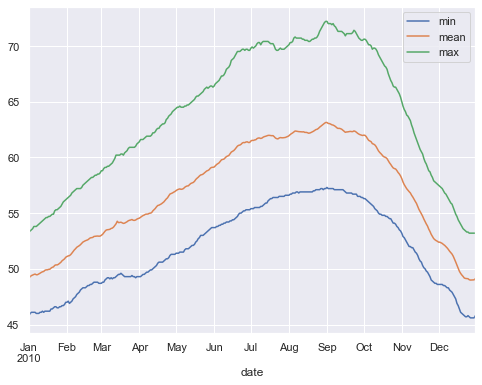

In [22]:
tempsdf.resample('D').temp.min().plot(label = 'min')
tempsdf.resample('D').temp.mean().plot(label = 'mean')
tempsdf.resample('D').temp.max().plot(label = 'max')
plt.legend()

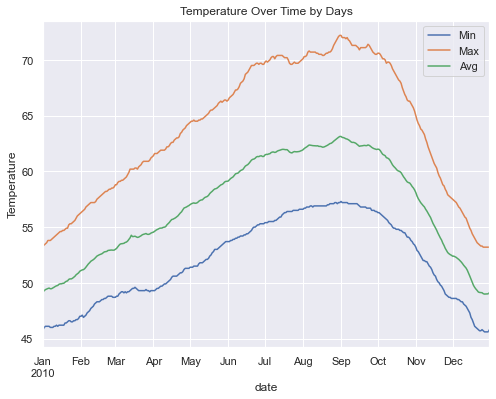

In [23]:
#alternate
tempsdf.resample('D').agg(['min','max','mean']).plot()
plt.title('Temperature Over Time by Days')
plt.ylabel('Temperature')
plt.legend(('Min','Max','Avg'))

***

`from vega_datasets import data
data.seattle_weather()`

Use the dataset to answer the following questions:

In [24]:
seattle = data.seattle_weather()
seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain


In [25]:
seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [26]:
seattle.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [27]:
#set datetime col as index and sort
seattle = seattle.set_index('date').sort_index()
seattle.head(3)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain


### 1. Which year and month combination has the highest amount of precipitation?
- March 2015

In [28]:
seattle.resample("M").max().sort_values(ascending = False, by = 'precipitation').head(1)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2015-03-31,55.90,20.60,10.60,5.70,sun


In [29]:
#alternate
seattle.resample('M').precipitation.max().idxmax()

Timestamp('2015-03-31 00:00:00', freq='M')

### 2. Visualize the amount of monthly precipitation over time.

Text(0, 0.5, 'Precipitation')

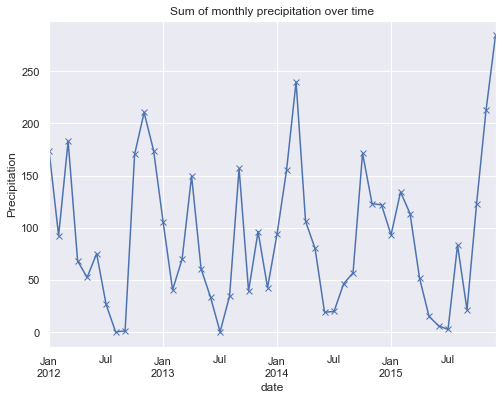

In [30]:
seattle.resample('M').precipitation.sum().plot(marker = 'x')
plt.title("Sum of monthly precipitation over time")
plt.ylabel("Precipitation")

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

Text(0, 0.5, 'Wind')

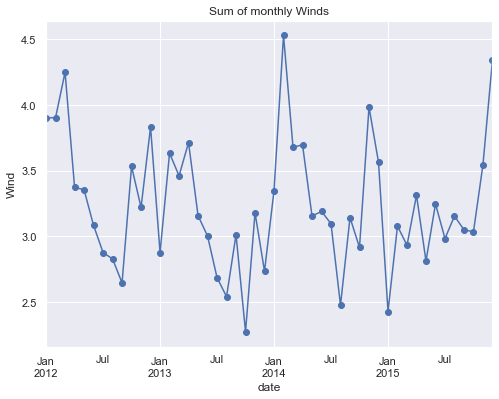

In [31]:
seattle.resample('M').wind.mean().plot(marker='o')
plt.title("Sum of monthly Winds")
plt.ylabel("Wind")

### 4. Which year-month combination is the windiest?

In [32]:
seattle.wind.resample('M').mean().sort_values().tail(1)

date
2014-02-28   4.53
Name: wind, dtype: float64

In [33]:
#alternate
seattle.wind.resample('M').mean().idxmax()

Timestamp('2014-02-28 00:00:00', freq='M')

### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
- 2014

In [34]:
seattle.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [35]:
seattle[seattle.weather == 'sun'].resample('Y').count().weather.sort_values().tail(1)


date
2014-12-31    211
Name: weather, dtype: int64

### 6. In which month does it rain the most?
- November

In [36]:
seattle[seattle.weather == 'rain'].resample('M').count().weather.sort_values().tail(1)

date
2012-11-30    25
Name: weather, dtype: int64

In [37]:
#alternate
seattle['month'] = seattle.index.month
seattle.groupby('month').precipitation.sum().sort_values()

month
7     48.20
6    132.90
8    163.70
5    207.50
9    235.50
4    375.40
2    422.00
1    466.00
10   503.40
3    606.20
12   622.70
11   642.50
Name: precipitation, dtype: float64

In [38]:
seattle.groupby('month').precipitation.sum().sort_values().tail(1)

month
11   642.50
Name: precipitation, dtype: float64

### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [39]:
seattle['did_rain'] = seattle.precipitation > 0

In [40]:
seattle.head()

,precipitation,temp_max,temp_min,wind,weather,month,did_rain
date,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,1,False
2012-01-02,10.90,10.60,2.80,4.50,rain,1,True
2012-01-03,0.80,11.70,7.20,2.30,rain,1,True
2012-01-04,20.30,12.20,5.60,4.70,rain,1,True
2012-01-05,1.30,8.90,2.80,6.10,rain,1,True


In [41]:
seattle.groupby('month').did_rain.mean()

month
1    0.53
2    0.65
3    0.59
4    0.49
5    0.27
6    0.31
7    0.09
8    0.18
9    0.29
10   0.49
11   0.59
12   0.65
Name: did_rain, dtype: float64

In [42]:
seattle.groupby('month').did_rain.mean().tail(1)

month
12   0.65
Name: did_rain, dtype: float64

***

`data.flights_20k()`

In [43]:
flights = data.flights_20k()
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [44]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [45]:
#set date as index
flights = flights.set_index('date').sort_index()
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [46]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2001-01-01 00:01:00 to 2001-03-31 21:30:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   delay        20000 non-null  int64 
 1   distance     20000 non-null  int64 
 2   origin       20000 non-null  object
 3   destination  20000 non-null  object
dtypes: int64(2), object(2)
memory usage: 781.2+ KB


### 1. Convert any negative delays to 0.

In [47]:
#create function
def delay_to_zero(x):
    if x < 0:
        x = 0
    return x

In [48]:
# use the function w/ (.apply)

flights.delay = flights.delay.apply(delay_to_zero)
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [49]:
#alternate:(np.where) Much faster if you have large dataset

flights.delay = np.where(flights.delay < 0, 0, flights.delay)
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


### 2. Which hour of the day has the highest average delay?

In [ ]:
flights['hour'] = flights.index.hour

In [50]:
# groupby by 'hour' and look at mean delay:
flights.groupby('hour').delay.mean()

hour
0    127.92
1    170.00
3    302.50
5      0.51
6      2.49
7      3.07
8      4.03
9      5.00
10     5.85
11     7.36
12     9.21
13    11.45
14    10.75
15    13.14
16    13.88
17    13.20
18    14.51
19    16.26
20    17.89
21    21.63
22    32.70
23    65.35
Name: delay, dtype: float64

In [51]:
#alternate
flights.groupby('hour').delay.mean().idxmax()

3

In [53]:
#alternate
flights.groupby('hour').delay.mean().sort_values().tail(1)

hour
3   302.50
Name: delay, dtype: float64

### 3. Does the day of the week make a difference in the delay amount?

### 4. Does the month make a difference in the delay amount?

***

### Bonus
`from vega_datasets import data
data.iowa_electricity()`

### 1. For each row, calculate the percentage of the year's total that energy source provided.

### 2. Lineplot of generation over time, color by source

### 3. Display the data as table where years are columns, and energy source is rows (Hint: `df.pivot_table`)

### 4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

### 5. Is the total generation increasing over time?

- How would you control for increasing consumption over time when considering how much energy is coming from each source?

- express each number as a % of the year's total
 

***

### 1. Use the `sf_temps` dataset

### 2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use `pd.cut` or `pd.qcut` for this)

### 3. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

### 4. Create pretty labels for time plots

### 5. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

***

Explore the `birdstrikes` dataset.

`df = data.birdstrikes()`